<h1><center>Recombination</center></h1>

For around the first 370,000 years the universe was filled with a hot "soup" of subatomic particles. When protons and elections combined to form a neutral hydrogen atom, they would quickly absorb a high energy photon and be torn apart again. The mean free path of photons was extremely small as they were constantly scattering off of free electrons. As a result, the universe was opaque to electromagnetic radiation. 

The main reaction during this period

\begin{equation}
    p + e^- \longleftrightarrow H + \gamma,
\end{equation}

occurred rapidly enough to be in near thermal equilibrium. We can therefore model their relative abundances using the Saha equation

\begin{equation}
    \frac{n_p n_e}{n_{H}} = c^3\left( \frac{m_e k_{B} T}{2 \pi \hbar^2} \right)^{3/2}\exp{\left(-\frac{E_{I}}{k_{B} T} \right)},
    \label{eq:saha1}
\end{equation}

where $n_p$, $n_e$ and $n_{H}$ are the number densities of protons, elections and hydrogen respectfully, $m_e$ is the electron mass, $T$ is the temperature of the universe and $E_{I} = 13.6$eV is the ionisation energy of hydrogen. 

Assuming the universe is neutral ($n_p = n_e$) the relative abundance of free elections and ionised hydrogen is given by

\begin{equation}
    x_e = x_p = \frac{n_e}{n_p+n_{H}}.
\end{equation}

We can use this to rewrite the Saha equation as
\begin{equation}
    \frac{x_e^2}{1-x_e} = \frac{c^3}{n_p+n_{H}}\left( \frac{m_e k_{B} T}{2 \pi \hbar^2} \right)^{3/2}\exp{\left(-\frac{E_{I}}{k_{B} T} \right)}.
    \label{eq:saha2}
\end{equation}

The combined number density of protons and hydrogen today is around $1.6$m$^{-3}$. Therefore, we since the length scales of the universe grow as $(1+z)^{-1}$ we know that

\begin{equation}
    n_p+n_{H} = 1.6 (1+z)^3 \text{ m}^{-3}.
    \label{eq:recom1}
\end{equation}

Additionally, we know that the temperature of the universe today is around 2.728K. During matter-domination, the temperature evolves as $\sim (1+z)$. Therefore, we can write that

\begin{equation}
    T = 2.728 (1+z) \text{ K}.
    \label{eq:recom2}
\end{equation}

We can therefore solve the Saha for $x_e$ over time.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

# Plotting style
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rc('font', size=18)

import matplotlib.patheffects as pe
path_effects=[pe.Stroke(linewidth=5, foreground='k'), pe.Normal(), 
              pe.SimpleLineShadow(alpha = 0.1, offset=(1.5,-1.5))]

In [5]:
kB = 8.61e-5 #eV/K
me = 0.510e6 #eV 
hbar = 6.58e-16
EI = 13.6 # eV
c = 299792458 #m/s

def TkB(z):
    return 2.728*kB*(1+z)

def nHnP(z):
    return 1.6*(1+z)**3

def solve(xe, z):
    A = xe**2/(1-xe)
    B = nHnP(z)**(-1)
    C = (me*TkB(z)/(2*np.pi*hbar**2))**(3/2)
    D = np.exp(-EI/TkB(z))
    return A - B*C*D/c**3

def saha(z):
    x_e = root(solve, x0 = 0.99999, args=(z)).x[0]
    return x_e

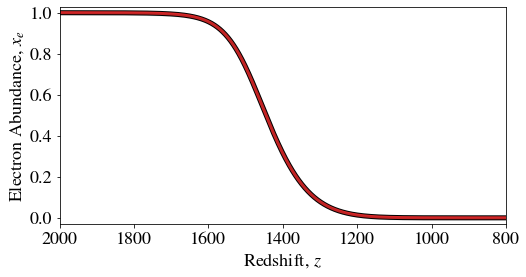

In [6]:
z = np.linspace(2000, 800, 1000)

x_e = np.array([saha(zi) for zi in z])

plt.figure(figsize = (8, 4))
plt.plot(z, x_e, lw=3, path_effects = path_effects, color = "tab:red")

#plt.plot([max(z), min(z)], [max(x_e)/2, max(x_e)/2], "k--")
#plt.plot([zre, zre], [-0.03, 1.03], "k--")
plt.xlim(max(z), min(z))
plt.ylim(-0.03, 1.03)
plt.ylabel("Electron Abundance, $x_e$")
plt.xlabel("Redshift, $z$")
plt.savefig("recomb.pdf", bbox_inches = "tight")

By finding the point at which $x_e = 0.5$, we can estimate the redshift of recombination.  

In [7]:
zre = min(z[x_e>0.5])
print("Redshift: {}".format(int(zre)))
print("Temp: {:.3}K".format(TkB(zre)/kB))

Redshift: 1445
Temp: 3.94e+03K
